plot read length distribution

In [10]:
# python modules
import sys
import copy
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from scipy import stats


In [11]:
# custom modules
sys.path.append('/Users/sangwoopark/Projects/condense-seq/postpro_scripts')
import graphics_edit as graphics
import load_file_edit as load_file
import Interval_dict
import statis_edit as statis


In [12]:
# matplotlib setting
%matplotlib inline
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"


In [13]:
### parameters
cell_org = {'H1':'human',
            'GM':'human',
            'E14':'mouse',
            'mCD8T:WT':'mouse',
            'mCD8T:DFMO':'mouse',
            'mCD8T:ODCKO':'mouse'}

cell_chrnames = {'H1':['chr%s' % (i) for i in range(1, 23)] + ['chrX', 'chrY'],
                 'GM':['chr%s' % (i) for i in range(1, 23)] + ['chrX'],
                 'E14':['chr%s' % (i) for i in range(1, 20)] + ['chrX', 'chrY'],
                 'mCD8T:WT':['chr%s' % (i) for i in range(1, 20)] + ['chrX'],
                 'mCD8T:DFMO':['chr%s' % (i) for i in range(1, 20)] + ['chrX'],
                 'mCD8T:ODCKO':['chr%s' % (i) for i in range(1, 20)] + ['chrX']}


In [14]:
agent_fullname = {'sp':'Spermine(4+)',
                  'spd':'Spermidine(3+)',
                  'CoH':'Cobalt Hexammine(3+)',
                  'PEG':'PEG 8000',
                  'HP1a':'HP1$\\alpha$',
                  'HP1bSUV':'HP1$\\beta$+tSUV',
                  'LKH':'Linker histone1',
                  'Ki67':'Ki67',
                  'FUS':'FUS',
                  'Mg':'Magnesium',
                  'Ca':'Calcium'}


In [15]:
### read rlen file
rlen_path = '/Users/sangwoopark/jhu_rockfish/2024_01_05_GEO/processed_files/'
rlen_fnames = ['H1_NCP_sp_%d_1rep_rlen.txt.gz' % (i) for i in range(10)]
rlen_counts = [load_file.read_rlen_file (rlen_path + fname) for fname in rlen_fnames]

In [16]:
### read titration file
titr_path = '/Users/sangwoopark/jhu_rockfish/2024_01_05_GEO/titration_files/'
titr_fname = 'H1_NCP_sp_titration.csv'
tnum_conc, tnum_frac = load_file.read_titration (titr_path + titr_fname)

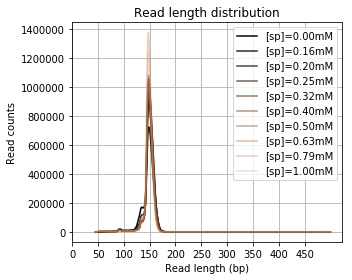

In [19]:
### plot rlen distribution [Extended Data Fig.2c]
labels = ['[sp]=%.2fmM' % (tnum_conc[i]) for i in range(10)]
colors = np.linspace(0.01, 0.7, num=len(rlen_counts))
alphas = np.linspace(0.3, 1, num=len(rlen_counts))[::-1]
cmap = mpl.cm.get_cmap("copper")

graphics.plot_rlen_dist (rlen_counts,
                         colors=[cmap(color) for color in colors],
                         alphas=alphas,
                         labels=labels,
                         fig_width=5,
                         fig_height=4,
                         save_path='./data/',
                         save=True,
                         note='H1_NCP_sp')
